# Обучим модели для фиксированного n

Загрузим датасет

In [4]:
import pandas as pd

df = pd.read_csv('../data/distance_graph_dataset.csv')

In [5]:
df.sample(10)

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
927,450,1,200,195,13,442,14
9380,250,0,74,74,11,240,14
9414,100,1,59,46,8,98,9
6603,300,0,102,102,7,254,11
9422,25,0,10,8,7,21,7
8605,300,0,84,84,11,290,13
1707,200,0,58,58,10,193,11
4736,450,1,206,194,13,447,14
8645,25,0,8,8,5,21,6
7236,25,1,11,9,3,10,5


Отберем только данные, где `n = 500`

In [6]:
df = df[df['n'] == 500]

In [7]:
df.describe()

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
count,873.0,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,500.0,0.515464,194.591065,185.193585,12.029782,489.584192,14.502864
std,0.0,0.500047,37.589023,31.463359,1.466454,7.888272,1.362271
min,500.0,0.000000,126.000000,120.000000,8.000000,436.000000,11.000000
25%,500.0,0.000000,158.000000,156.000000,11.000000,489.000000,14.000000
50%,500.0,1.000000,213.000000,182.000000,12.000000,491.000000,14.000000
75%,500.0,1.000000,230.000000,215.000000,13.000000,494.000000,15.000000
max,500.0,1.000000,257.000000,250.000000,17.000000,500.000000,20.000000


In [8]:
df = df.drop('n', axis=1)

In [9]:
df.sample(10)

,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
7442,1,214,209,15,496,17
1546,0,149,148,11,489,15
4812,1,247,166,13,494,14
6729,1,213,202,13,493,15
620,0,141,139,13,493,16
3295,1,227,220,16,490,19
1509,1,228,221,10,481,12
1511,0,147,145,13,489,16
9138,1,203,196,12,488,15
2242,0,147,147,14,477,16


Посмотрим на распределение признаков:

In [10]:
counts = df['distribution'].value_counts()
props = df['distribution'].value_counts(normalize=True)
print(counts, props)

distribution
1    450
0    423
Name: count, dtype: int64 distribution
1    0.515464
0    0.484536
Name: proportion, dtype: float64


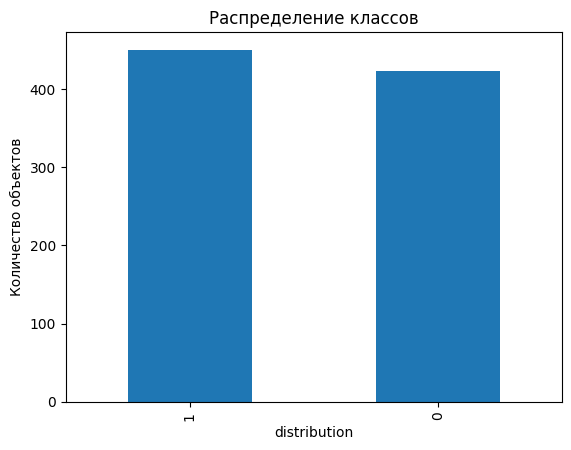

In [11]:
import matplotlib.pyplot as plt

counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('distribution')
plt.ylabel('Количество объектов')
plt.show()

Распределение примерно одинаковое

In [12]:
RANDOM_STATE = 42
N = 100
target = 'distribution'

**Функции для вычисления мощности и ошибки первого рода**

In [13]:
from sklearn.metrics import confusion_matrix

def power_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    power = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return power

def type1_err_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    type1_error = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    return type1_error

## Обучим логистическую регрессию

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE))
])

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [18]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)
power     = power_score(y_test, y_pred)
type1_err = type1_err_score(y_test, y_pred)

In [19]:
print(f'Accuracy:    {accuracy:.4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1-score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')
print(f'Power:       {power:.4f}')
print(f'Type 1 Error {type1_err:.4f}')

Accuracy:    1.0000
Precision:   1.0000
Recall:      1.0000
F1-score:    1.0000
ROC AUC:     1.0000
Power:       1.0000
Type 1 Error 0.0000


**Вывод:**

Для `n = 500` обычная линейная регрессия, без подбора гиперпараметров, показала очень хорошие метрики.\
Результаты:
* мощность: `1.0`
* ошибка первого рода: `0`

Для достоверности результатов попробуем обучить еще несколько моделей.

## Обучим SVM с kernel='linear'

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [21]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [22]:
pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True, random_state=RANDOM_STATE)
)

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [24]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [25]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      1.0000
Precision:     1.0000
Recall:        1.0000
F1-score:      1.0000
ROC AUC:       1.0000
Power:         1.0000
Type 1 Error:  0.0000


**Вывод:**

`SVM` показал аналогичные результаты, даже не пришлось запускать `RandomizedSearchCV`.
Результаты:
* мощность: `1.0`
* ошибка первого рода: `0`

## RandomForest

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE))
])

In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [30]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [31]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      1.0000
Precision:     1.0000
Recall:        1.0000
F1-score:      1.0000
ROC AUC:       1.0000
Power:         1.0000
Type 1 Error:  0.0000


**Вывод:**

При `n == 500` даже `RandomForest` показал идеальные метрики качества, хотя при меньших `n` всегда показывал худшие результаты, чем другие модели.\
Результаты:
* мощность: `1.0`
* ошибка первого рода: `0`

## Результаты
* мощность: `1.0`
* ошибка первого рода: `0`

При достаточно больших `n = 500` все алгоритмы могут определить гипотезу с вероятностью, которая стремится к 100%.